In [ ]:
!pip install numpy pandas matplotlib seaborn plotly folium --quiet

In [ ]:
!pip install opendatasets scikit-learn --upgrade --quiet

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/archive (3).zip', 'r') as zipObj:
   zipObj.extractall('')

In [ ]:
data_df=pd.read_csv('/content/ENB2012_data.csv')

In [ ]:
data_df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
data_df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer

In [ ]:
# Identify input and target columns
input_cols, target_col = data_df.columns[:-2], data_df.columns[-2:]
inputs_df, targets = data_df[input_cols].copy(), data_df[target_col].copy()

In [ ]:
for col in input_cols:
  print(inputs_df[col].nunique())

12
12
7
4
2
4
4
6


Seems all input cols are cateogorical

In [ ]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [ ]:
inputs_df=inputs_df.astype('object')

In [ ]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      768 non-null    object
 1   X2      768 non-null    object
 2   X3      768 non-null    object
 3   X4      768 non-null    object
 4   X5      768 non-null    object
 5   X6      768 non-null    object
 6   X7      768 non-null    object
 7   X8      768 non-null    object
dtypes: object(8)
memory usage: 48.1+ KB


In [ ]:
categorical_cols = inputs_df.select_dtypes(include='object').columns.tolist()

In [ ]:
categorical_cols

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

In [ ]:
input_cols

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')

In [ ]:
inputs=inputs_df.drop(input_cols,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs,val_inputs,train_targets,val_targets=train_test_split(inputs.values,targets,test_size=0.1,shuffle=True,random_state=42)

In [ ]:
def acc(targets,preds):
    return mse(targets,preds,squared=False)

In [ ]:
def cv(model,inputs,targets,n_splits):
    result=[]
    kf=KFold(n_splits=n_splits,shuffle=False)
    for train_index, val_index in kf.split(inputs):
        model.fit(inputs.iloc[train_index],targets.iloc[train_index])
        result+=[{'train_acc':acc(targets.iloc[train_index],model.predict(inputs.iloc[train_index])),'val_acc':acc(targets.iloc[val_index],model.predict(inputs.iloc[val_index]))}]
    df = pd.DataFrame(result)
    print("train_acc: {} , val_acc: {}".format(df.mean()[0],df.mean()[1]))

##SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as rmse

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(train_inputs,train_targets['Y1'])
print("train_loss: {} , val_loss: {}".format(rmse(train_targets['Y1'],regressor.predict(train_inputs),squared=False),rmse(val_targets['Y1'],regressor.predict(val_inputs),squared=False)))

train_loss: 2.6107913690563413 , val_loss: 3.112194195702283


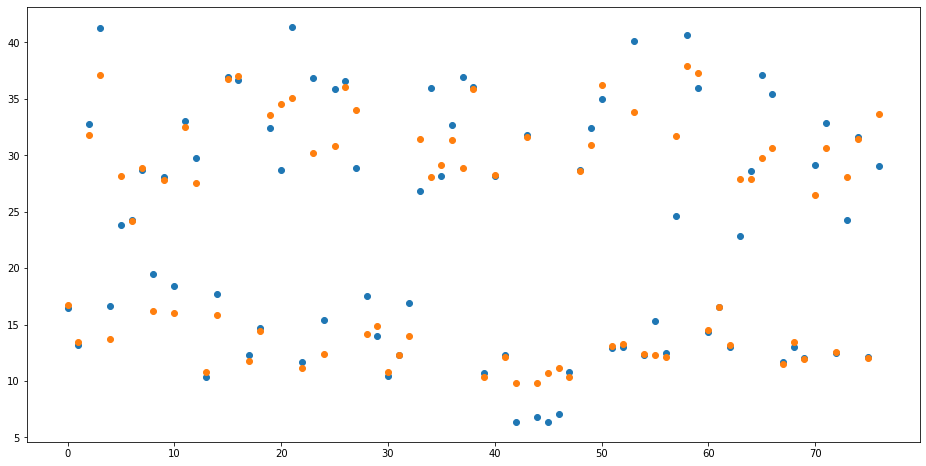

In [ ]:
plt.figure(figsize=(16,8))

plt.scatter(x=np.arange(val_inputs.shape[0]),y=val_targets['Y1'])
plt.scatter(x=np.arange(val_inputs.shape[0]),y=regressor.predict(val_inputs))

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(train_inputs,train_targets['Y2'])
print("train_loss: {} , val_loss: {}".format(rmse(train_targets['Y2'],regressor.predict(train_inputs),squared=False),rmse(val_targets['Y2'],regressor.predict(val_inputs),squared=False)))

train_loss: 3.021496245988896 , val_loss: 3.542105591704135


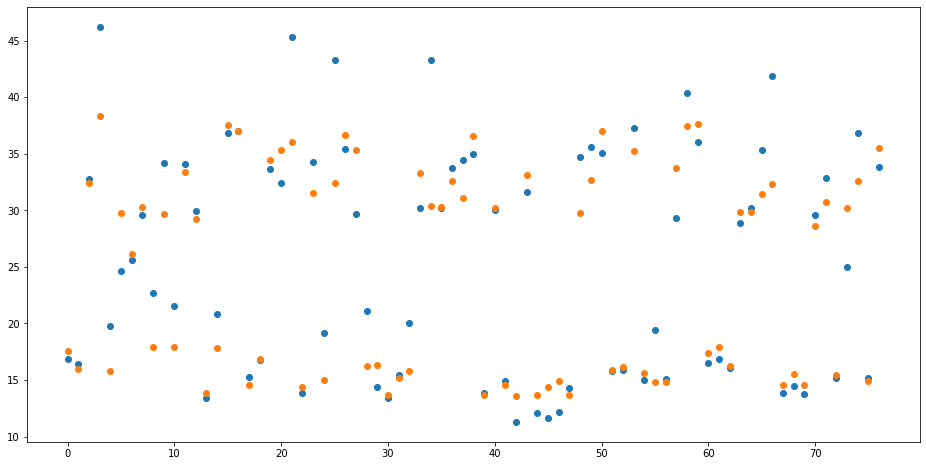

In [ ]:
plt.figure(figsize=(16,8))

plt.scatter(x=np.arange(val_inputs.shape[0]),y=val_targets['Y2'])
plt.scatter(x=np.arange(val_inputs.shape[0]),y=regressor.predict(val_inputs))

## XGBOOST

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from xgboost import XGBRegressor

In [ ]:
model=XGBRegressor(n_jobs=-1, random_state=42,objective ='reg:squarederror', verbosity = 0)

In [ ]:
cv(model,inputs,targets['Y1'],10)

train_acc: 0.4227360364301688 , val_acc: 1.1915007149432755


In [ ]:
cv(model,inputs,targets['Y2'],10)

train_acc: 1.3189117500459964 , val_acc: 1.8469902881113989


### HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 600, num = 20)]
max_depth = [int(x) for x in np.linspace(1,10, num = 10)]
min_child_weight = [0.1,0.2,0,3,0.4,0.5,0.6,0.7,0.8,0.9,1]
learning_rate=[0.1,0.2,0,3,0.4,0.5,0.6,0.7,0.8,0.9,1]
random_grid = {'n_estimators':n_estimators,'max_depth': max_depth,'learning_rate': learning_rate}  ## 'min_child_weight': min_child_weight

In [ ]:
rf = XGBRegressor(random_state=42,n_jobs=-1,objective='reg:squarederror')
rf_random = GridSearchCV(estimator = rf, param_grid=random_grid,cv = 5,verbose=10,scoring='neg_root_mean_squared_error',n_jobs = -1)
rf_random.fit(inputs, targets['Y1']);

Fitting 5 folds for each of 2200 candidates, totalling 11000 fits
[07:29:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rf_random.best_params_

{'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 316}

train_acc: 0.14077309699353507 , val_acc: 1.1482398062967434


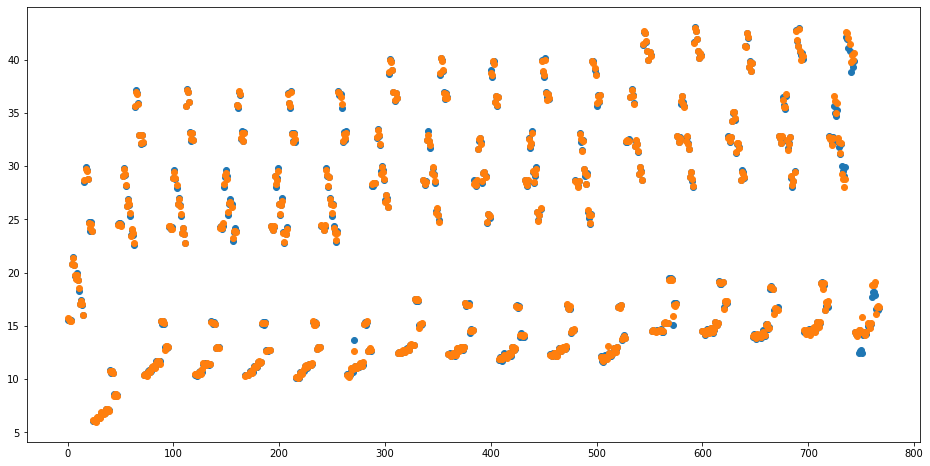

In [ ]:
model=XGBRegressor(random_state=42,n_jobs=-1,objective='reg:squarederror',max_depth=3,n_estimators=316,learning_rate=0.4)
## model=XGBRegressor(random_state=42,n_jobs=-1,objective='reg:squarederror',max_depth=7,n_estimators=333,learning_rate=0.4)
cv(model,inputs,targets['Y1'],10)
plt.figure(figsize=(16,8))

plt.scatter(x=np.arange(inputs.shape[0]),y=targets['Y1'])
plt.scatter(x=np.arange(inputs.shape[0]),y=model.predict(inputs))

In [ ]:
reg = XGBRegressor(random_state=42,n_jobs=-1,objective='reg:squarederror')
reg_random = GridSearchCV(estimator = rf, param_grid=random_grid,cv = 5,verbose=10,scoring='neg_root_mean_squared_error',n_jobs = -1)
reg_random.fit(inputs, targets['Y2']);

Fitting 5 folds for each of 2200 candidates, totalling 11000 fits


In [ ]:
reg_random.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 600}

train_acc: 0.11277681380421889 , val_acc: 0.9651353690919203


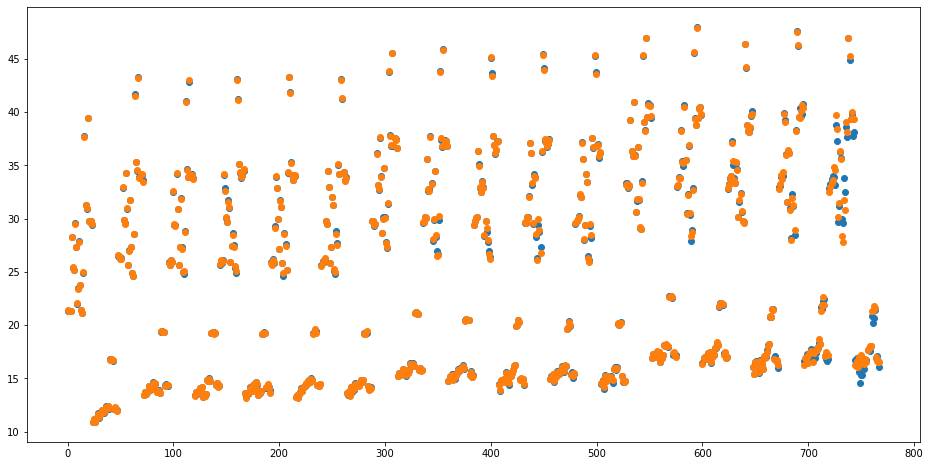

In [ ]:
model=XGBRegressor(random_state=42,n_jobs=-1,objective='reg:squarederror',max_depth=3,n_estimators=900,learning_rate=0.5)
cv(model,inputs,targets['Y2'],10)
plt.figure(figsize=(16,8))

plt.scatter(x=np.arange(inputs.shape[0]),y=targets['Y2'])
plt.scatter(x=np.arange(inputs.shape[0]),y=model.predict(inputs))

# RANDOMFOREST REGRESSOR

In [ ]:
rf=RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=9,n_estimators=100,min_samples_leaf=3,min_samples_split=2,bootstrap=True)

In [ ]:
cv(rf,inputs,targets['Y1'],10)
cv(rf,inputs,targets['Y2'],10)

train_acc: 0.4333324664178404 , val_acc: 1.1466281273215586
train_acc: 1.4363353607213192 , val_acc: 2.016197126895645


### HYPERPARAMEYER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 600, num = 10)]
max_depth = [int(x) for x in np.linspace(1,10,num = 10)]
max_depth.append(None)
min_samples_split = [2,3,4]
min_samples_leaf = [1,2,3]
bootstrap=[True,False]

random_grid = {'n_estimators':n_estimators,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap':bootstrap}

In [ ]:
rf = RandomForestRegressor(random_state=42,n_jobs=-1)
rf_random = GridSearchCV(estimator = rf, param_grid=random_grid,cv = 3,verbose=2,scoring='neg_root_mean_squared_error',n_jobs = -1)
rf_random.fit(inputs, targets['Y1']);

Fitting 3 folds for each of 1980 candidates, totalling 5940 fits


In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 1}

train_acc: 0.970561364554062 , val_acc: 1.2197321617620818


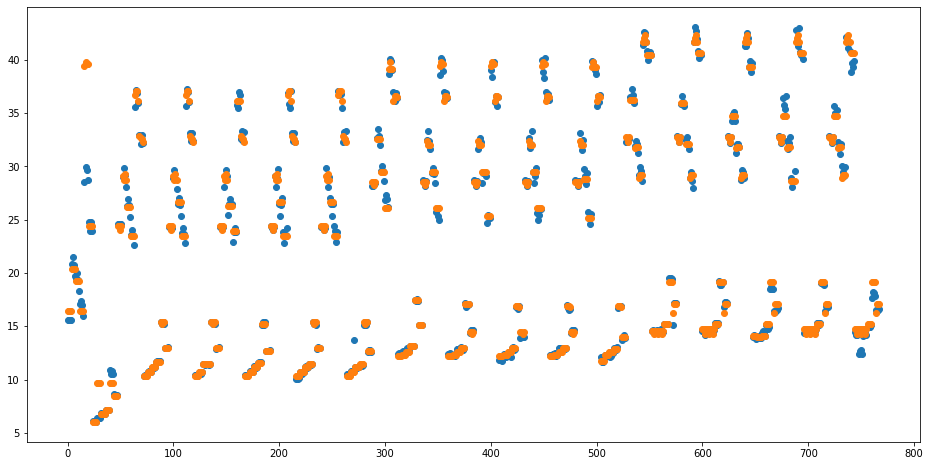

In [ ]:
model=RandomForestRegressor(random_state=42,n_jobs=-1,max_depth=9,n_estimators=1,min_samples_leaf=3,min_samples_split=2,bootstrap=True)
cv(model,inputs,targets['Y1'],10)
plt.figure(figsize=(16,8))

plt.scatter(x=np.arange(inputs.shape[0]),y=targets['Y1'])
plt.scatter(x=np.arange(inputs.shape[0]),y=model.predict(inputs))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 1, stop = 600, num = 20)]
max_depth = [int(x) for x in np.linspace(1,10,num = 10)]
max_depth.append(None)
min_samples_split = [2,3,4]
min_samples_leaf = [1,2,3]
bootstrap=[True,False]

random_grid = {'n_estimators':n_estimators,'max_depth': max_depth,'bootstrap':bootstrap}

In [ ]:
rf = RandomForestRegressor(random_state=42,n_jobs=-1)
rf_random = GridSearchCV(estimator = rf, param_grid=random_grid,cv = 3,verbose=2,scoring='neg_root_mean_squared_error',n_jobs = -1)
rf_random.fit(inputs, targets['Y2']);
rf_random.best_params_

Fitting 3 folds for each of 440 candidates, totalling 1320 fits


{'bootstrap': True, 'max_depth': None, 'n_estimators': 473}

train_acc: 1.610980294513047 , val_acc: 1.959938437131872


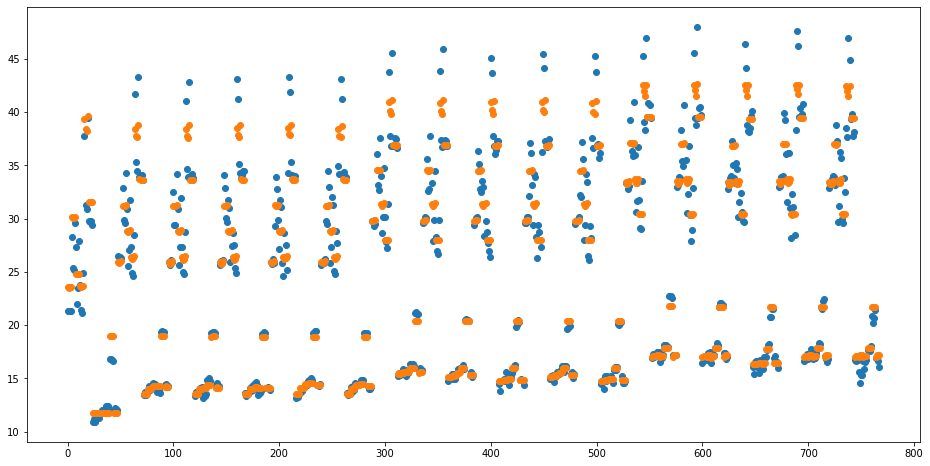

In [ ]:
model=RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=473,min_samples_leaf=6,min_samples_split=3,bootstrap=True)
cv(model,inputs,targets['Y2'],10)
plt.figure(figsize=(16,8))

plt.scatter(x=np.arange(inputs.shape[0]),y=targets['Y2'])
plt.scatter(x=np.arange(inputs.shape[0]),y=model.predict(inputs))

We plot train and val loss graphs side by side using this function.